In [1]:
%config IPCompleter.greedy=True
%matplotlib notebook
# https://github.com/Microsoft/LightGBM/blob/master/examples/python-guide/plot_example.py
import lightgbm as lgb                                                                                                                                                                                                            
import pandas as pd                                                                                                                                                                                                               
import matplotlib.pyplot as plt
import pickle

In [2]:
print('load data...')                                                                                                                                                                                                             
df_train = pd.read_csv('/home/ubuntu/repos/creative-predictor/distribution/train8.csv', header=None, sep=',')                                                                                                                     
df_test = pd.read_csv('/home/ubuntu/repos/creative-predictor/distribution/test8.csv', header=None, sep=',')                                                                                                                       
                                                                                                                                                                                                                                  
y_train = df_train[0].values                                                                                                                                                                                                      
y_test = df_test[0].values                                                                                                                                                                                                        
X_train = df_train.drop(0, axis=1).values                                                                                                                                                                                         
X_test = df_test.drop(0, axis=1).values 

load data...


In [3]:
# create dataset for lightgbm                                                                                                                                                                                                     
lgb_train = lgb.Dataset(X_train, y_train)                                                                                                                                                                                         
lgb_test = lgb.Dataset(X_test, y_test)                                                                                                                                                                                            
                                                                                                                                                                                                                                  
params = {                                                                                                                                                                                                                        
  'boosting_type': 'gbdt',                                                                                                                                                                                                        
  'objective': 'regression',                                                                                                                                                                                                      
  'metric': 'l2',                                                                                                                                                                                                                 
  'metric_freq': 1,                                                                                                                                                                                                               
  'is_training_metric': 'true',                                                                                                                                                                                                   
  'max_bin': 255,                                                                                                                                                                                                                 
  'num_trees': 1000,                                                                                                                                                                                                              
  'learning_rate': 0.05,                                                                                                                                                                                                          
  'num_leaves': 31,                                                                                                                                                                                                               
  'tree_learner': 'serial',                                                                                                                                                                                                       
  'feature_fraction': 0.8,                                                                                                                                                                                                        
  'bagging_freq': 5,
  'bagging_fraction': 1.0,                                                                                                                                                                                                        
  'min_data_in_leaf': 50,                                                                                                                                                                                                         
  'min_sum_hessian_in_leaf': 5.0,                                                                                                                                                                                                 
  'verbosity': 3                                                                                                                                                                                                                  
  }                                                                                                                                                                                                                               
                                                                                                                                                                                                                                  
evals_result = {} 

feature_list = []                                                                                                                                                                                                                 
                                                                                                                                                                                                                                  
with open('/home/ubuntu/repos/creative-predictor/tag_idx2.pkl', 'rb') as pkl:                                                                                                                                                     
  obj = pickle.load(pkl)                                                                                                                                                                                                          
                                                                                                                                                                                                                                  
  for o in sorted(obj.items(), key=lambda x: x[1]):   
    feature_list.append(o[0])

print(feature_list[0])

room


In [4]:
print('start training...')                                                                                                                                                                                                        
gbm = lgb.train(params,                                                                                                                                                                                                           
                lgb_train,                                                                                                                                                                                                        
                valid_sets=[lgb_train, lgb_test],                                                                                                                                                                                 
                feature_name=feature_list,                                                                                                                                                                 
                evals_result=evals_result                                                                                                                                                                                           
                )  

start training...


/usr/local/lib/python3.5/dist-packages/lightgbm/engine.py:99: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's l2: 0.0294837	valid_1's l2: 0.0248654
[2]	training's l2: 0.0294522	valid_1's l2: 0.0248422
[3]	training's l2: 0.0294228	valid_1's l2: 0.0248201
[4]	training's l2: 0.0294006	valid_1's l2: 0.0248029
[5]	training's l2: 0.0293768	valid_1's l2: 0.0247846
[6]	training's l2: 0.0293541	valid_1's l2: 0.0247672
[7]	training's l2: 0.0293318	valid_1's l2: 0.0247502
[8]	training's l2: 0.029313	valid_1's l2: 0.0247372
[9]	training's l2: 0.0292975	valid_1's l2: 0.0247271
[10]	training's l2: 0.0292812	valid_1's l2: 0.0247169
[11]	training's l2: 0.0292649	valid_1's l2: 0.0247055
[12]	training's l2: 0.0292507	valid_1's l2: 0.024694
[13]	training's l2: 0.0292368	valid_1's l2: 0.0246849
[14]	training's l2: 0.0292243	valid_1's l2: 0.0246761
[15]	training's l2: 0.0292121	valid_1's l2: 0.0246675
[16]	training's l2: 0.0292043	valid_1's l2: 0.0246615
[17]	training's l2: 0.0291947	valid_1's l2: 0.0246549
[18]	training's l2: 0.0291861	valid_1's l2: 0.0246487
[19]	training's l2: 0.0291769	valid_1's

[153]	training's l2: 0.028898	valid_1's l2: 0.0245347
[154]	training's l2: 0.0288966	valid_1's l2: 0.024533
[155]	training's l2: 0.0288959	valid_1's l2: 0.0245328
[156]	training's l2: 0.028895	valid_1's l2: 0.024533
[157]	training's l2: 0.028894	valid_1's l2: 0.0245331
[158]	training's l2: 0.0288935	valid_1's l2: 0.0245332
[159]	training's l2: 0.0288925	valid_1's l2: 0.0245337
[160]	training's l2: 0.0288919	valid_1's l2: 0.0245334
[161]	training's l2: 0.0288909	valid_1's l2: 0.0245338
[162]	training's l2: 0.0288903	valid_1's l2: 0.0245336
[163]	training's l2: 0.0288896	valid_1's l2: 0.0245337
[164]	training's l2: 0.0288882	valid_1's l2: 0.0245332
[165]	training's l2: 0.0288874	valid_1's l2: 0.0245334
[166]	training's l2: 0.0288864	valid_1's l2: 0.0245336
[167]	training's l2: 0.0288859	valid_1's l2: 0.0245336
[168]	training's l2: 0.0288855	valid_1's l2: 0.0245332
[169]	training's l2: 0.0288848	valid_1's l2: 0.0245331
[170]	training's l2: 0.0288837	valid_1's l2: 0.0245334
[171]	training'

[307]	training's l2: 0.028802	valid_1's l2: 0.0245283
[308]	training's l2: 0.0288017	valid_1's l2: 0.0245282
[309]	training's l2: 0.0288002	valid_1's l2: 0.0245285
[310]	training's l2: 0.0287998	valid_1's l2: 0.0245283
[311]	training's l2: 0.0287986	valid_1's l2: 0.0245275
[312]	training's l2: 0.0287976	valid_1's l2: 0.0245279
[313]	training's l2: 0.0287971	valid_1's l2: 0.024528
[314]	training's l2: 0.0287969	valid_1's l2: 0.024528
[315]	training's l2: 0.0287961	valid_1's l2: 0.0245285
[316]	training's l2: 0.0287957	valid_1's l2: 0.0245283
[317]	training's l2: 0.0287954	valid_1's l2: 0.0245282
[318]	training's l2: 0.0287952	valid_1's l2: 0.0245282
[319]	training's l2: 0.028795	valid_1's l2: 0.0245281
[320]	training's l2: 0.0287941	valid_1's l2: 0.0245287
[321]	training's l2: 0.0287935	valid_1's l2: 0.0245289
[322]	training's l2: 0.028793	valid_1's l2: 0.0245293
[323]	training's l2: 0.0287928	valid_1's l2: 0.0245293
[324]	training's l2: 0.0287926	valid_1's l2: 0.0245293
[325]	training'

[469]	training's l2: 0.028733	valid_1's l2: 0.024539
[470]	training's l2: 0.0287328	valid_1's l2: 0.0245389
[471]	training's l2: 0.0287326	valid_1's l2: 0.0245389
[472]	training's l2: 0.0287318	valid_1's l2: 0.0245391
[473]	training's l2: 0.0287313	valid_1's l2: 0.024539
[474]	training's l2: 0.0287312	valid_1's l2: 0.024539
[475]	training's l2: 0.028731	valid_1's l2: 0.0245389
[476]	training's l2: 0.0287303	valid_1's l2: 0.0245392
[477]	training's l2: 0.0287294	valid_1's l2: 0.0245396
[478]	training's l2: 0.028729	valid_1's l2: 0.0245398
[479]	training's l2: 0.0287287	valid_1's l2: 0.0245397
[480]	training's l2: 0.0287284	valid_1's l2: 0.0245397
[481]	training's l2: 0.0287282	valid_1's l2: 0.0245397
[482]	training's l2: 0.0287281	valid_1's l2: 0.0245397
[483]	training's l2: 0.0287276	valid_1's l2: 0.0245398
[484]	training's l2: 0.0287275	valid_1's l2: 0.0245398
[485]	training's l2: 0.0287269	valid_1's l2: 0.0245395
[486]	training's l2: 0.0287267	valid_1's l2: 0.0245396
[487]	training's

[622]	training's l2: 0.0286872	valid_1's l2: 0.0245442
[623]	training's l2: 0.0286871	valid_1's l2: 0.0245441
[624]	training's l2: 0.0286869	valid_1's l2: 0.0245441
[625]	training's l2: 0.0286867	valid_1's l2: 0.0245441
[626]	training's l2: 0.0286863	valid_1's l2: 0.0245444
[627]	training's l2: 0.0286863	valid_1's l2: 0.0245443
[628]	training's l2: 0.0286861	valid_1's l2: 0.0245443
[629]	training's l2: 0.028686	valid_1's l2: 0.0245443
[630]	training's l2: 0.0286858	valid_1's l2: 0.0245443
[631]	training's l2: 0.0286856	valid_1's l2: 0.0245442
[632]	training's l2: 0.0286853	valid_1's l2: 0.0245443
[633]	training's l2: 0.0286852	valid_1's l2: 0.0245442
[634]	training's l2: 0.028685	valid_1's l2: 0.0245443
[635]	training's l2: 0.028685	valid_1's l2: 0.0245443
[636]	training's l2: 0.0286848	valid_1's l2: 0.0245442
[637]	training's l2: 0.0286847	valid_1's l2: 0.0245443
[638]	training's l2: 0.0286842	valid_1's l2: 0.0245442
[639]	training's l2: 0.0286839	valid_1's l2: 0.0245446
[640]	trainin

[776]	training's l2: 0.0286486	valid_1's l2: 0.0245561
[777]	training's l2: 0.0286483	valid_1's l2: 0.0245561
[778]	training's l2: 0.0286482	valid_1's l2: 0.0245561
[779]	training's l2: 0.028648	valid_1's l2: 0.0245561
[780]	training's l2: 0.0286479	valid_1's l2: 0.024556
[781]	training's l2: 0.0286474	valid_1's l2: 0.0245563
[782]	training's l2: 0.028647	valid_1's l2: 0.0245565
[783]	training's l2: 0.0286467	valid_1's l2: 0.0245566
[784]	training's l2: 0.0286465	valid_1's l2: 0.0245568
[785]	training's l2: 0.0286463	valid_1's l2: 0.0245569
[786]	training's l2: 0.0286455	valid_1's l2: 0.0245571
[787]	training's l2: 0.0286448	valid_1's l2: 0.0245571
[788]	training's l2: 0.0286446	valid_1's l2: 0.0245571
[789]	training's l2: 0.0286445	valid_1's l2: 0.0245571
[790]	training's l2: 0.0286443	valid_1's l2: 0.024557
[791]	training's l2: 0.0286437	valid_1's l2: 0.0245572
[792]	training's l2: 0.0286432	valid_1's l2: 0.0245575
[793]	training's l2: 0.0286427	valid_1's l2: 0.0245579
[794]	training

[932]	training's l2: 0.0286064	valid_1's l2: 0.0245671
[933]	training's l2: 0.0286063	valid_1's l2: 0.024567
[934]	training's l2: 0.0286062	valid_1's l2: 0.0245669
[935]	training's l2: 0.0286059	valid_1's l2: 0.0245662
[936]	training's l2: 0.0286058	valid_1's l2: 0.0245661
[937]	training's l2: 0.0286053	valid_1's l2: 0.0245666
[938]	training's l2: 0.0286053	valid_1's l2: 0.0245666
[939]	training's l2: 0.028605	valid_1's l2: 0.0245667
[940]	training's l2: 0.0286047	valid_1's l2: 0.0245668
[941]	training's l2: 0.0286043	valid_1's l2: 0.0245671
[942]	training's l2: 0.0286043	valid_1's l2: 0.0245671
[943]	training's l2: 0.0286041	valid_1's l2: 0.0245667
[944]	training's l2: 0.0286039	valid_1's l2: 0.0245667
[945]	training's l2: 0.0286038	valid_1's l2: 0.0245668
[946]	training's l2: 0.0286035	valid_1's l2: 0.0245671
[947]	training's l2: 0.0286031	valid_1's l2: 0.0245674
[948]	training's l2: 0.028603	valid_1's l2: 0.0245674
[949]	training's l2: 0.0286029	valid_1's l2: 0.0245674
[950]	trainin

plot metrics during training...


<IPython.core.display.Javascript object>


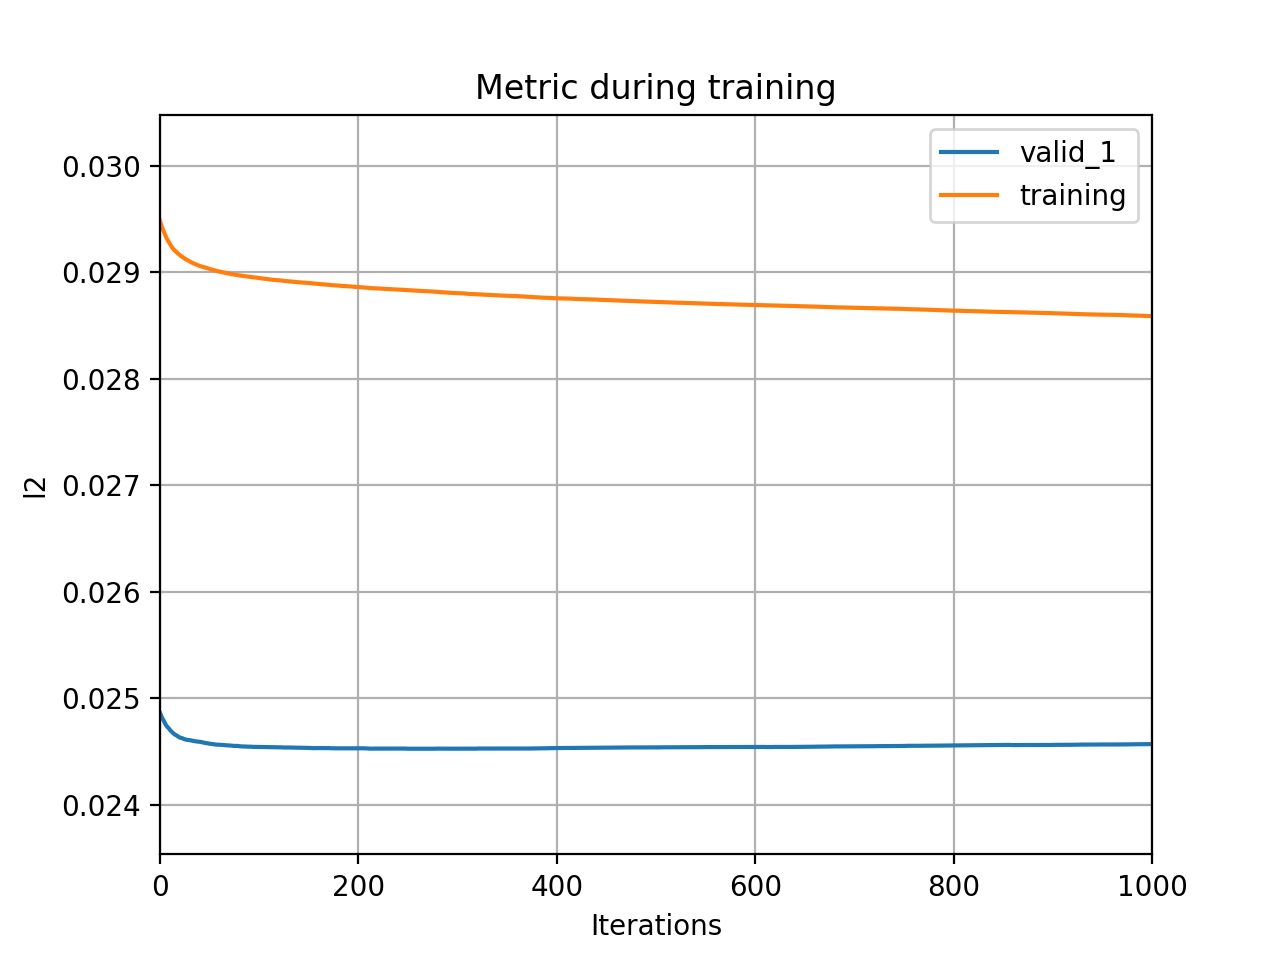

In [5]:
print('plot metrics during training...')                                                                                                                                                                                          
ax = lgb.plot_metric(evals_result, metric='l2')                                                                                                                                                                                    
plt.show() 

plot feature importances...


<IPython.core.display.Javascript object>


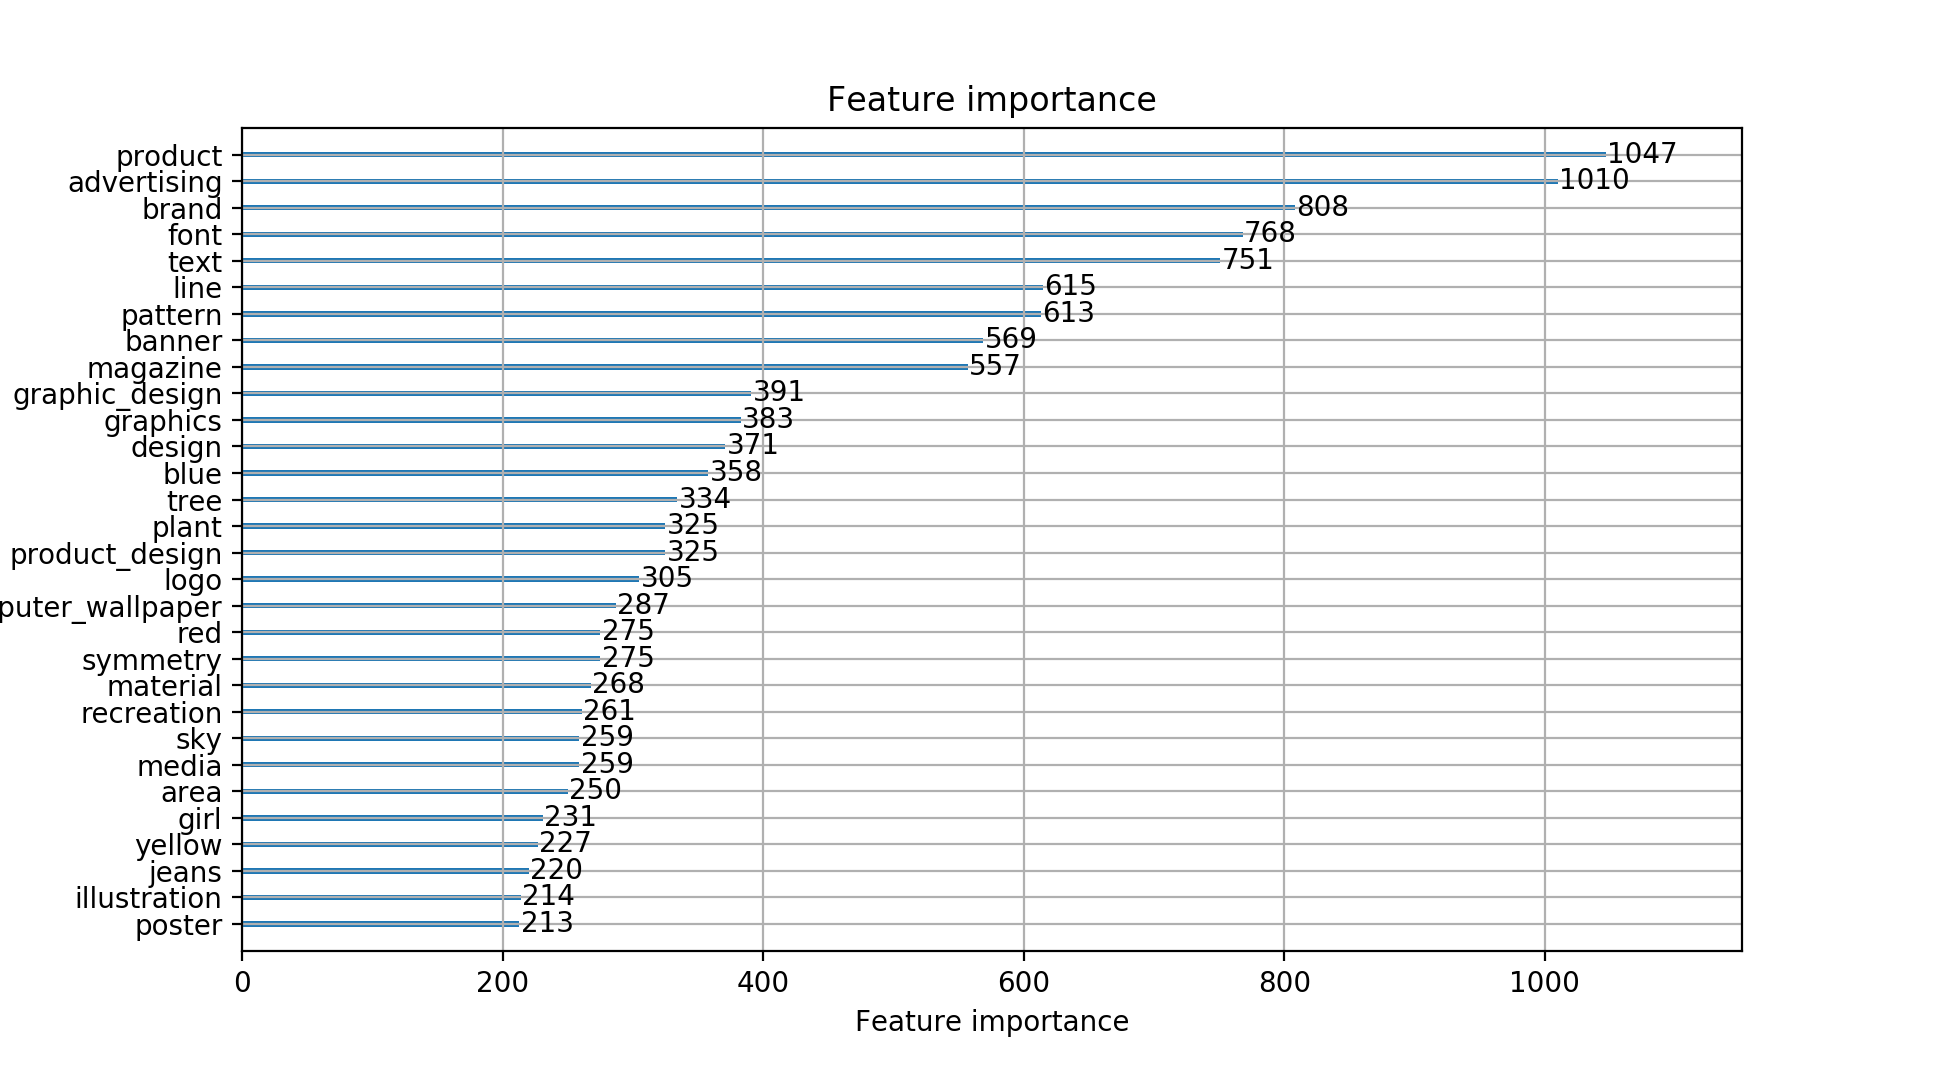

In [6]:
print('plot feature importances...')                                
ax = lgb.plot_importance(gbm, max_num_features=30)
plt.show()

plot feature importances data...


<IPython.core.display.Javascript object>


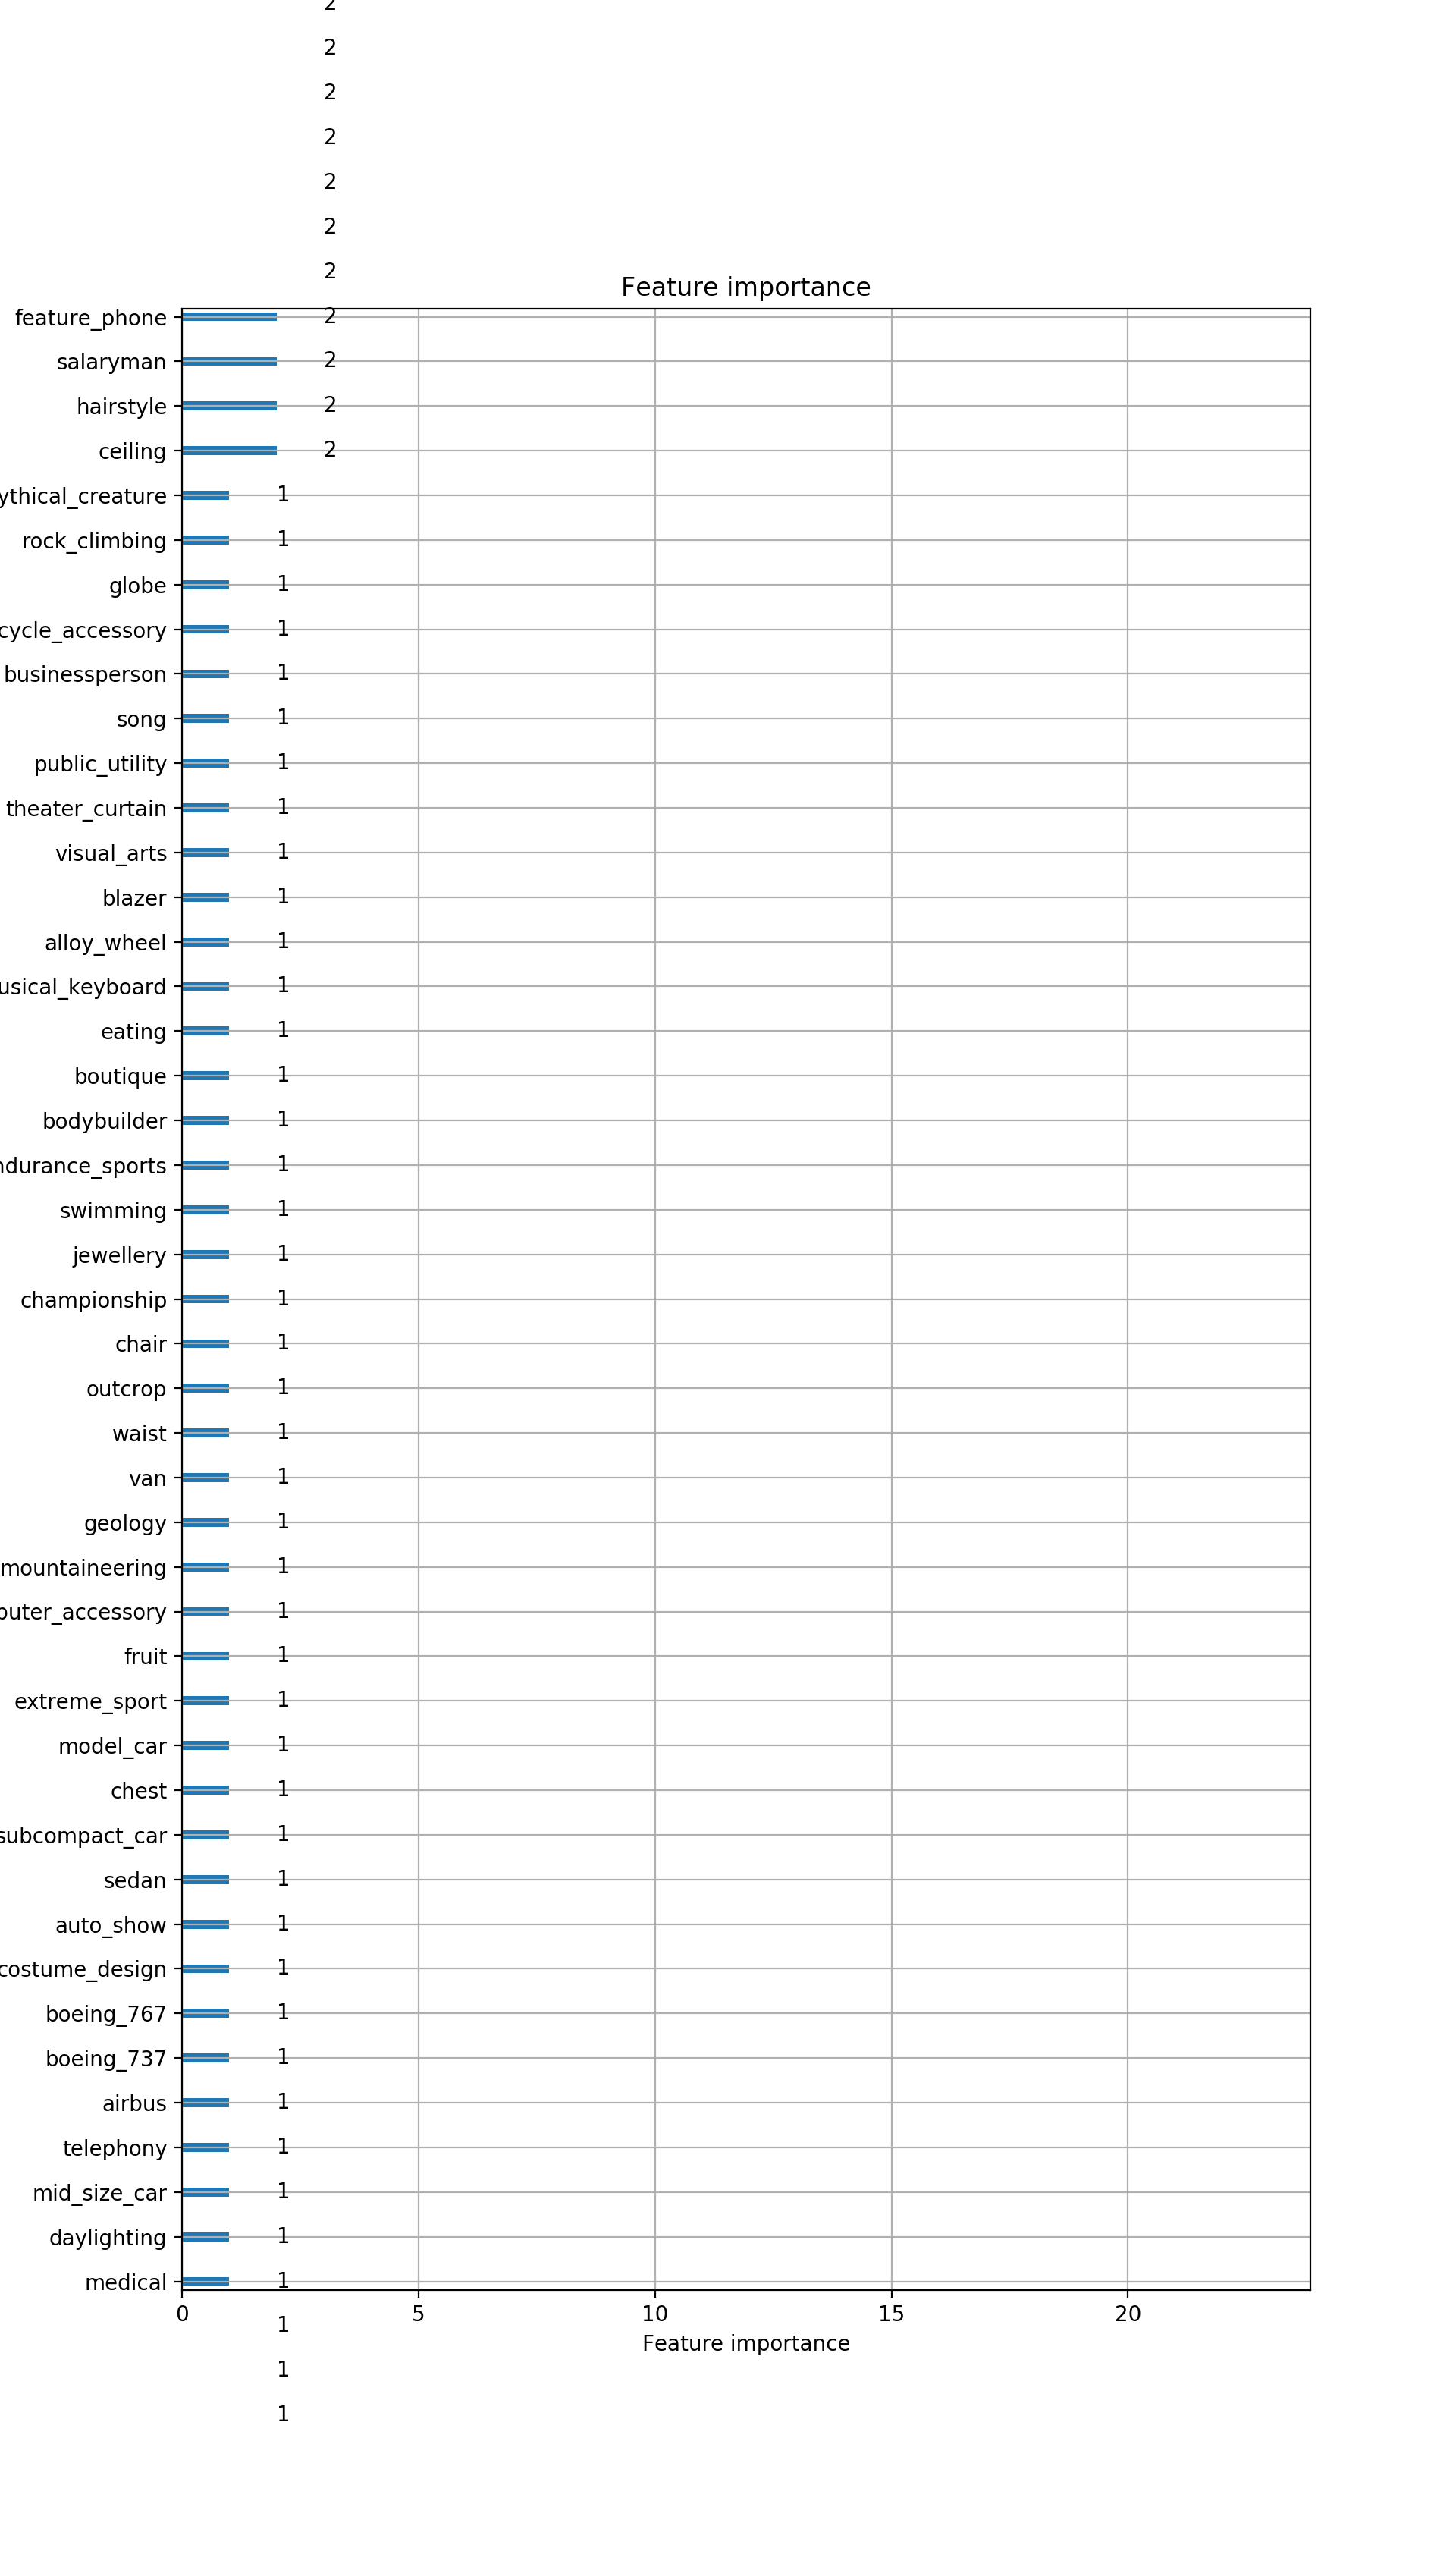

In [7]:
print('plot feature importances data...')                                
ax = lgb.plot_importance(gbm, max_num_features=1679)
plt.show()